In [1]:
##Import packages##
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import nltk
from wordcloud import WordCloud
import nltk
import seaborn as sns



In [2]:
###Loading the dataset####

df1=pd.read_csv("/Users/max/Desktop/capstone/Fake.csv",encoding = 'utf-8', header = 0)
df2=pd.read_csv("/Users/max/Desktop/capstone/True.csv",encoding = 'utf-8', header = 0)


#adding column "label" as fake and true for respective datasets
df1["label"]='Fake'
df2["label"]='True'

#df1.head()#checking first 5 records
#df2.head()#checking first 5 records

# Merging the 2 datasets
news=pd.concat([df1,df2], ignore_index = True) 
news.isna().sum()

news=pd.read_csv("C:/Users/sruth/Desktop/Summer sem/Text mining/Team project/news.csv",encoding = 'utf-8', header = 0)


#checking for null values/ Check for missing values
print('Checking null values .. . ',df1.isnull().sum())
print('Checking null values .. . ',df2.isnull().sum())


#Summary of news
print(news.describe())
#news number of rows and columns
print(news.shape)
#news data set columns list 
print(list(news))

df1.head()
df2.head()



Checking null values .. .  title      0
text       0
subject    0
date       0
label      0
dtype: int64
Checking null values .. .  title      0
text       0
subject    0
date       0
label      0
dtype: int64
                                                    title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   

             subject                date  label  
count          44898               44898  44898  
unique             8                2397      2  
top     politicsNews  December 20, 2017    Fake  
freq           11272                 182  23481  
(44898, 5)
['title', 'text', 'subject', 'date', 'label']


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [3]:
#A utility function to calculate the avg. length of the text (in number of words.)

def avg_text_length(news):
    rowCounts = [len(x.split()) for x in news["text"].tolist()]
    avgCount = sum(rowCounts)//len(rowCounts)
    
    return avgCount

print("Avg. text length for fake news: {}".format(avg_text_length(df1)))
print("Avg. text length for true news: {}".format(avg_text_length(df2)))

Avg. text length for fake news: 423
Avg. text length for true news: 385


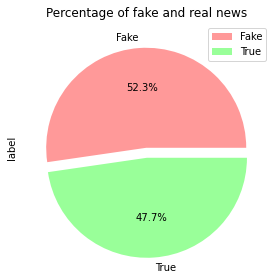

In [5]:
#checking for data balance...cont
import matplotlib.pyplot as plt
from matplotlib import cm
colors = ['#ff9999','#99ff99']
news.label.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', explode = [0,0.1],colors=colors)
plt.title('Percentage of fake and real news')
plt.legend(['Fake', 'True'])
plt.tight_layout()
plt.show()

(23481, 5)
(21417, 5)


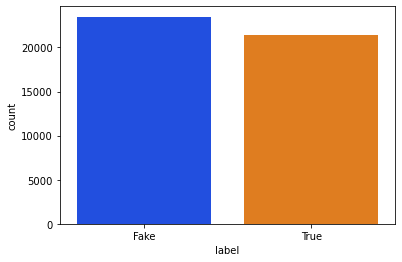

In [7]:
#other alternative for checking whether data is balanced or not
print(df1.shape)
print(df2.shape)
sns.set_palette("bright")
sns.countplot(x="label", data=news);
plt.show()


In [8]:
###Data Preprosessing for news###

#Text to lower case
news['title']=news['title'].str.lower()
news['text']=news['text'].str.lower()

#remove punctuations, special characters, numbers using regex
news['title'] = news['title'].str.replace(r'[^a-z ]', '').astype('str')
news['text'] = news['text'].str.replace(r'[^a-z ]', '').astype('str')

#Tokenization of sentences , words

news['title_tokenized_sents'] = news.apply(lambda row: nltk.sent_tokenize(row['title']), axis=1)
news['title_tokenized_words'] = news.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

news['text_tokenized_sents'] = news.apply(lambda row: nltk.sent_tokenize(row['text']), axis=1)
news['text_tokenized_words'] = news.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


#Remove stopwords
stop = stopwords.words('english')
news['title_stopwords'] = news['title_tokenized_words'].apply(lambda x: [item for item in x if item not in stop])
news['text_stopwords'] = news['text_tokenized_words'].apply(lambda x: [item for item in x if item not in stop])

#Stemming- Didn't work perfectly
#stemmer = SnowballStemmer("english", ignore_stopwords=True)
#news['titlewords'] = news['title_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#news['textwords'] = news['text_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

lemmatizer = WordNetLemmatizer() 
news['title_words'] = news['title_stopwords'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.
news['text_words'] = news['text_stopwords'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.


news1=news.drop(columns=['title_stopwords','text_stopwords','title_tokenized_words','text_tokenized_words'])
news1.to_csv('news1.csv',index=False)


In [9]:
###Data Preprosessing for fake news dataset ###
fnews=pd.read_csv("/Users/max/Desktop/capstone/Fake.csv",encoding = 'utf-8', header = 0)
#Text to lower case
fnews['title']=fnews['title'].str.lower()
fnews['text']=fnews['text'].str.lower()

#remove punctuations, special characters, numbers using regex
fnews['title'] = fnews['title'].str.replace(r'[^a-z ]', '').astype('str')
fnews['text'] = fnews['text'].str.replace(r'[^a-z ]', '').astype('str')

#Tokenization of sentences , words

fnews['title_tokenized_sents'] = fnews.apply(lambda row: nltk.sent_tokenize(row['title']), axis=1)
fnews['title_tokenized_words'] = fnews.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

fnews['text_tokenized_sents'] = fnews.apply(lambda row: nltk.sent_tokenize(row['text']), axis=1)
fnews['text_tokenized_words'] = fnews.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


#Remove stopwords
stop = stopwords.words('english')
fnews['title_stopwords'] = fnews['title_tokenized_words'].apply(lambda x: [item for item in x if item not in stop])
fnews['text_stopwords'] = fnews['text_tokenized_words'].apply(lambda x: [item for item in x if item not in stop])

#Stemming/lemmatizer
#stemmer = SnowballStemmer("english", ignore_stopwords=True)
#fnews['title_stemmed'] = fnews['title_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#fnews['text_stemmed'] = fnews['text_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
lemmatizer = WordNetLemmatizer() 
fnews['Title_words'] = fnews['title_stopwords'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.
fnews['text_words'] = fnews['text_stopwords'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.

fnews1=fnews.drop(columns=['title_stopwords','text_stopwords','title_tokenized_words','text_tokenized_words'])
fnews1.to_csv('fnews1.csv',index=False)

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


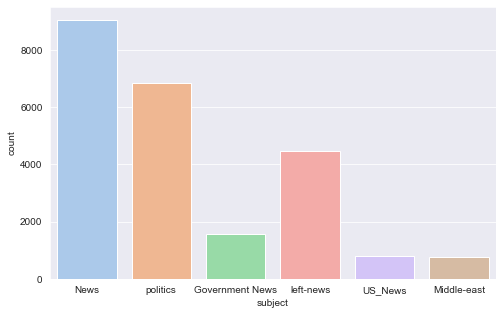

In [10]:
##keyitems/ columns in dataset and their distribution
for key,count in fnews.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{fnews.shape[0]}")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fnews)
plt.show()

Fake news articles wordcloud.


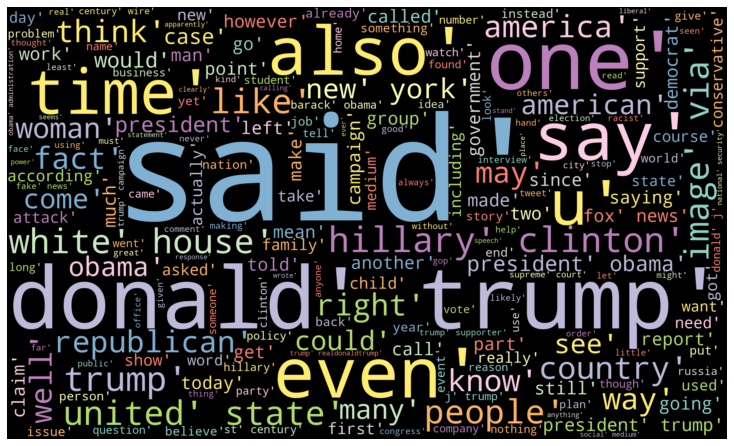

In [11]:
##Finding the most used words in fake using Word cloud
cloud = WordCloud(max_words=200,colormap='Set3', background_color="black",width=2500, height=1500,max_font_size=500).generate(" ".join(fnews1["text_words"].astype(str)))
plt.figure(figsize=(10, 8))
plt.imshow(cloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print("Fake news articles wordcloud.")

In [12]:
###Data Preprosessing for true news dataset###
tnews=pd.read_csv("/Users/max/Desktop/capstone/True.csv",encoding = 'utf-8', header = 0)
#Text to lower case
tnews['title']=tnews['title'].str.lower()
tnews['text']=tnews['text'].str.lower()

#remove punctuations, special characters, numbers using regex
tnews['title'] = tnews['title'].str.replace(r'[^a-z ]', '').astype('str')
tnews['text'] = tnews['text'].str.replace(r'[^a-z ]', '').astype('str')

#Tokenization of sentences , words

tnews['title_tokenized_sents'] = tnews.apply(lambda row: nltk.sent_tokenize(row['title']), axis=1)
tnews['title_tokenized_words'] = tnews.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

tnews['text_tokenized_sents'] = tnews.apply(lambda row: nltk.sent_tokenize(row['text']), axis=1)
tnews['text_tokenized_words'] = tnews.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


#Remove stopwords
stop = stopwords.words('english')
tnews['title_stopwords'] = tnews['title_tokenized_words'].apply(lambda x: [item for item in x if item not in stop])
tnews['text_stopwords'] = tnews['text_tokenized_words'].apply(lambda x: [item for item in x if item not in stop])

#Stemming/lemmatizer
#stemmer = SnowballStemmer("english", ignore_stopwords=True)
#fnews['title_stemmed'] = fnews['title_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#fnews['text_stemmed'] = fnews['text_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
lemmatizer = WordNetLemmatizer() 
tnews['Title_words'] = tnews['title_stopwords'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.
tnews['text_words'] = tnews['text_stopwords'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.


tnews1=tnews.drop(columns=['title_stopwords','text_stopwords','title_tokenized_words','text_tokenized_words'])
tnews1.to_csv('tnews1.csv',index=False)

politicsNews:	11272
worldnews:	10145
Total Records:	21417


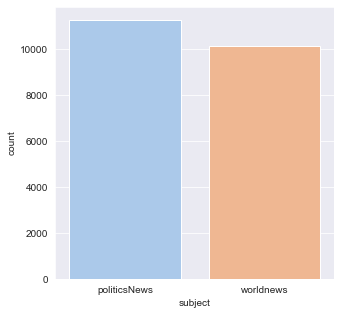

In [13]:
#keyitems/columns in dataset and their distribution
for key,count in tnews.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{tnews.shape[0]}")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
sns.countplot("subject", data=tnews)
plt.show()

True news articles wordcloud.


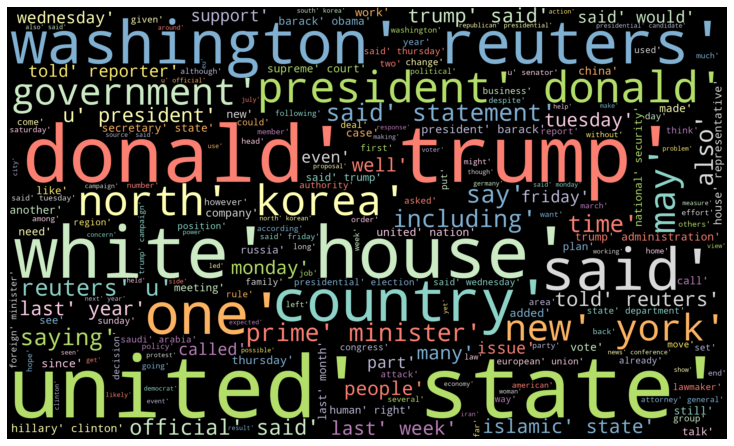

In [14]:
##Finding the most used words in fake and real news using Word cloud

cloud = WordCloud(max_words=200,colormap='Set3', background_color="black",width=2500, height=1500,max_font_size=500).generate(" ".join(tnews1["text_words"].astype(str)))
plt.figure(figsize=(10, 8))
plt.imshow(cloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
print("True news articles wordcloud.")


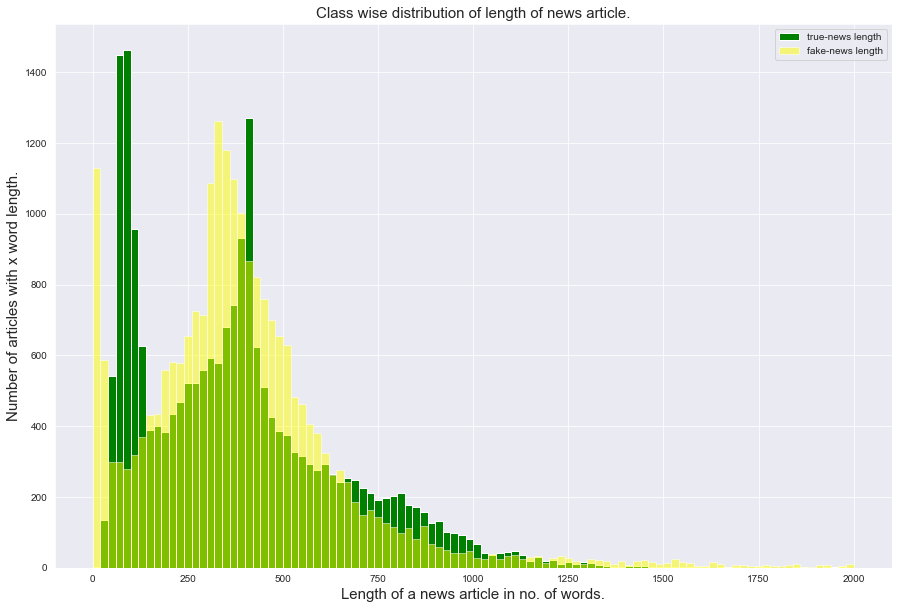

In [15]:
# Plotting the histogram for meaningful insights.

true_lengths = pd.Series([len(x.split()) for x in df2["text"].tolist()])
fake_lengths = pd.Series([len(x.split()) for x in df1["text"].tolist()])

plt.figure(figsize = (15,10))
plt.hist(true_lengths, bins = 100, range = [0, 2000], color = "green", label = "true-news length")
plt.hist(fake_lengths, bins = 100, range = [0, 2000], color = "yellow", alpha = 0.5, label = "fake-news length")
plt.xlabel("Length of a news article in no. of words.", fontsize = 15)
plt.ylabel("Number of articles with x word length.", fontsize = 15)
plt.title("Class wise distribution of length of news article.", fontsize = 15)
plt.legend()
plt.show()